In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = "retina"

In [2]:
segment = pd.read_csv("emed0033_segment.csv")
lon_range = (25, 42)
lat_range = (34, 43)
segment["centroid_lon"] = 0.5 * (segment.lon1 + segment.lon2)
segment["centroid_lat"] = 0.5 * (segment.lat1 + segment.lat2)


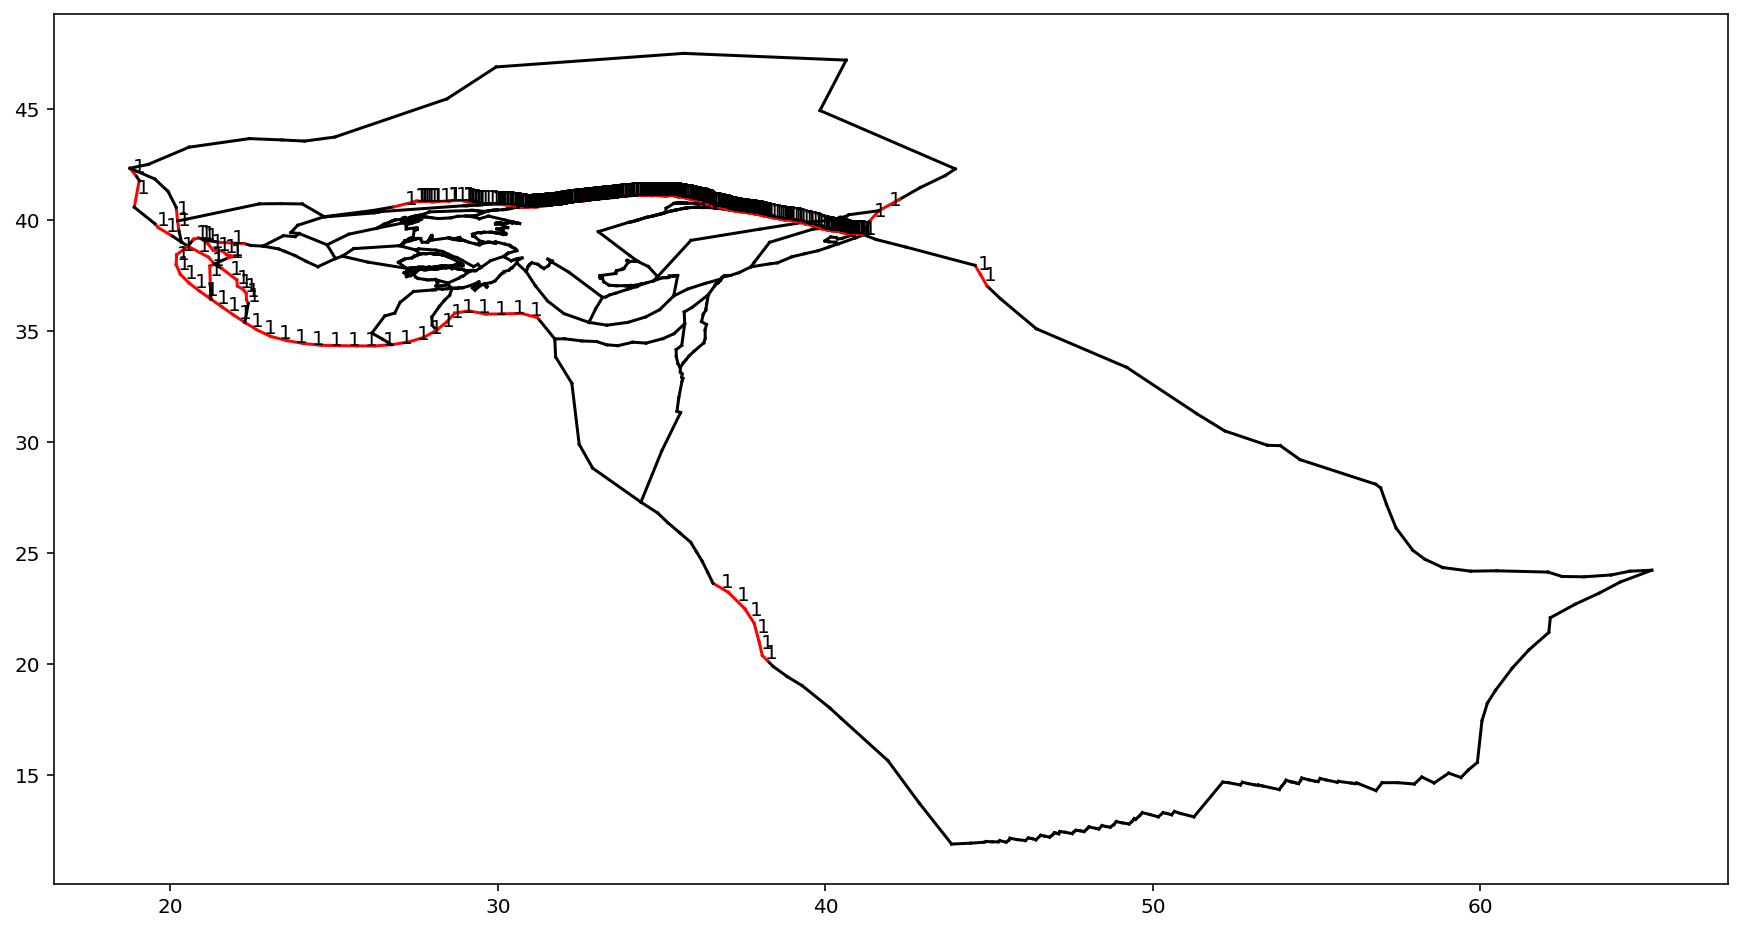

In [9]:
plt.figure(figsize=(15, 8))

for i in range(len(segment)):
    if segment.patch_flag[i] == 1:
        plt.plot([segment.lon1[i], segment.lon2[i]], [segment.lat1[i], segment.lat2[i]], "-r")
        plt.text(segment.centroid_lon[i], segment.centroid_lat[i], str(segment.patch_flag[i]), clip_on=True)
    else:
        plt.plot([segment.lon1[i], segment.lon2[i]], [segment.lat1[i], segment.lat2[i]], "-k")
# plt.xlim([lon_range[0], lon_range[1]])
# plt.ylim([lat_range[0], lat_range[1]])
plt.show()

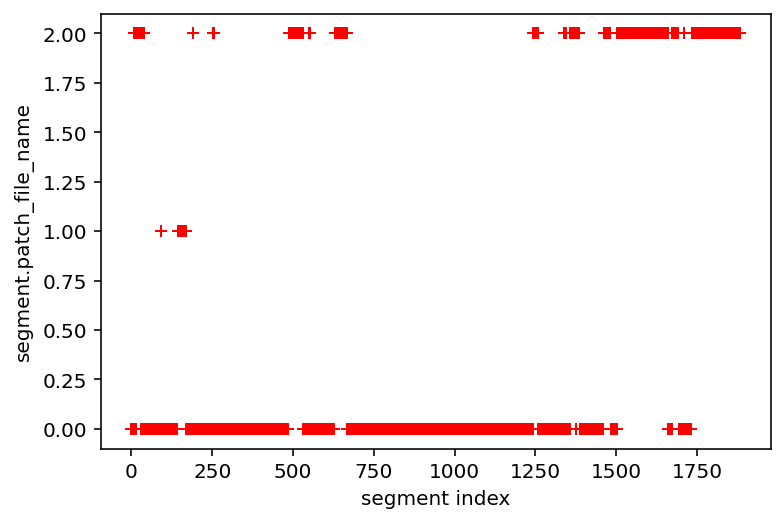

In [4]:
plt.figure()
plt.plot(segment.patch_file_name, "r+")
plt.xlabel("segment index")
plt.ylabel("segment.patch_file_name")
plt.show()

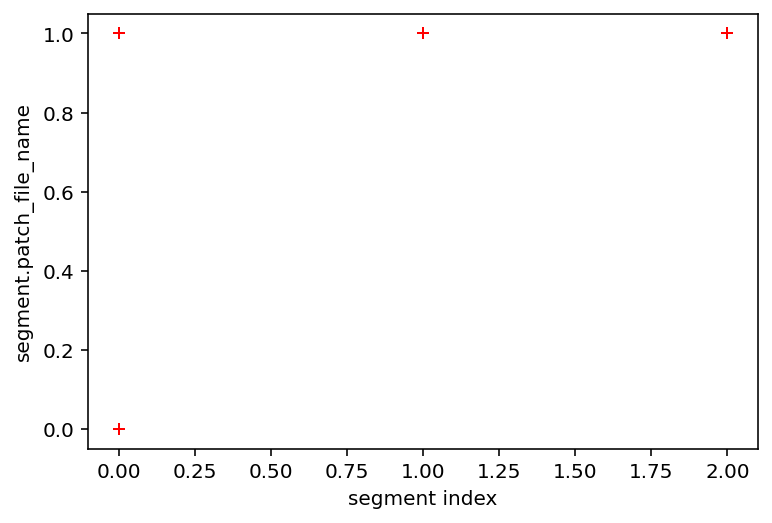

In [5]:
plt.figure()
plt.plot(segment.patch_file_name, segment.patch_flag, "r+")
plt.xlabel("segment index")
plt.ylabel("segment.patch_file_name")
plt.show()

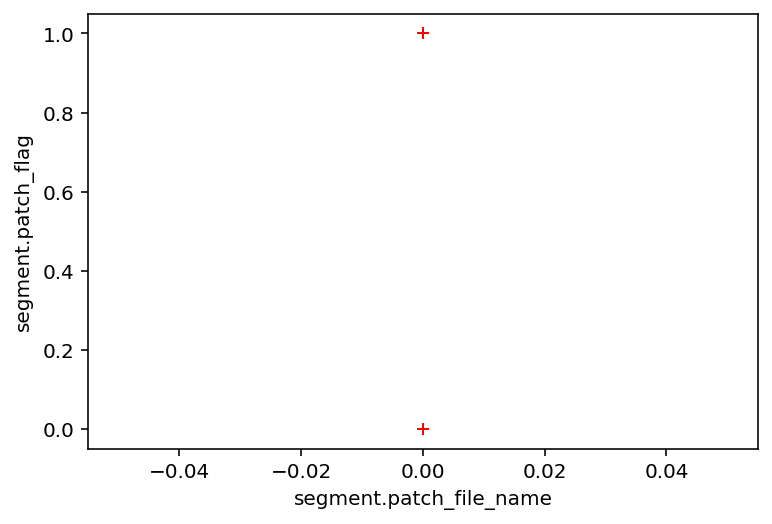

In [15]:
# Find segments with 0 patch_file_name and 1 patch_flag
patch_flag_1_idx = np.where(segment.patch_flag == 1)[0]
patch_file_name_0_idx = np.where(segment.patch_file_name == 0)[0]
idx = np.intersect1d(patch_flag_1_idx, patch_file_name_0_idx)
segment.patch_flag.values[idx] = 0

# Find indices for Aegean segment.patch_file_name == 1
# and set patch_file_name and patch_flag to 0
aegean_idx = np.where(segment.patch_file_name == 1)[0]
segment.patch_file_name.values[aegean_idx] = 0
segment.patch_flag.values[aegean_idx] = 0

# Find indices for NAF segment.patch_file_name == 2
# and set patch_file_name 0
naf_idx = np.where(segment.patch_file_name == 2)[0]
segment.patch_file_name.values[naf_idx] = 0


plt.figure()
plt.plot(segment.patch_file_name, segment.patch_flag, "r+")
plt.xlabel("segment.patch_file_name")
plt.ylabel("segment.patch_flag")
plt.show()

In [11]:
np.intersect1d(patch_flag_1_idx, patch_file_name_0_idx)

array([ 41,  42,  43,  44,  45,  46,  47,  48,  49,  64,  65,  68,  69,
        70,  71,  77,  78,  88,  89,  90,  91, 101, 228, 229, 230, 231,
       232, 233, 269, 270, 279, 280, 281, 282, 283, 284])

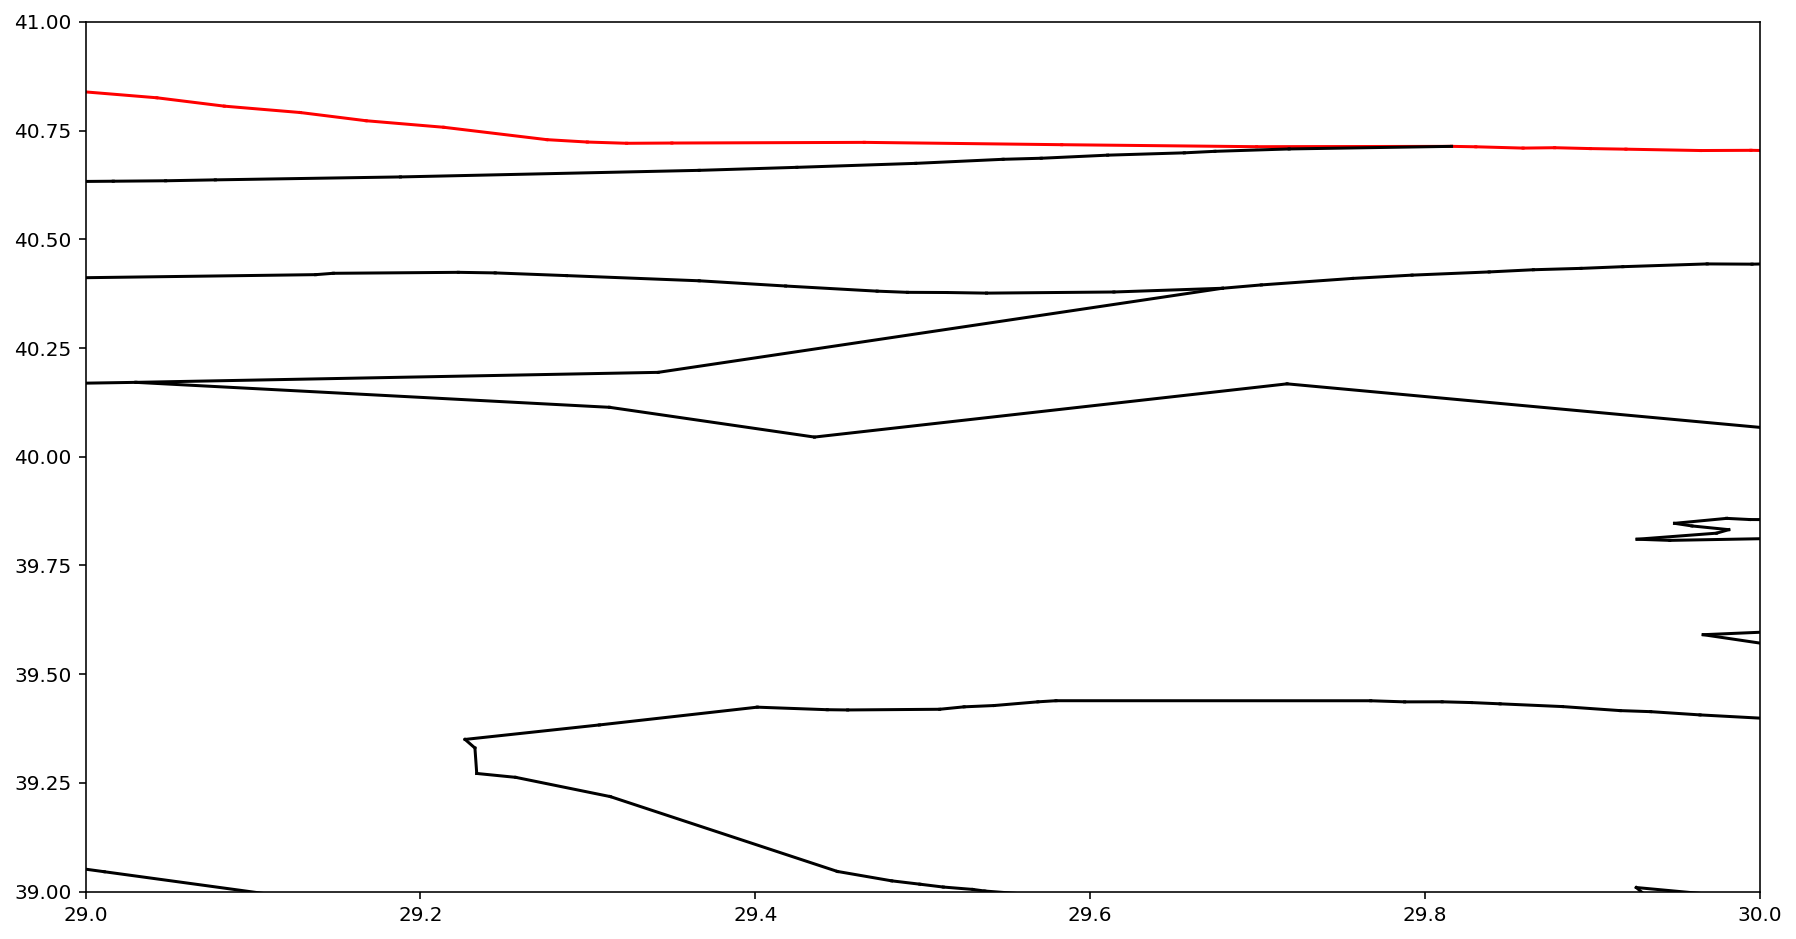

In [21]:
plt.figure(figsize=(15, 8))

for i in range(len(segment)):
    if segment.patch_flag[i] == 1:
        plt.plot([segment.lon1[i], segment.lon2[i]], [segment.lat1[i], segment.lat2[i]], "-r")
        # plt.text(segment.centroid_lon[i], segment.centroid_lat[i], str(segment.patch_flag[i]), clip_on=True)
    else:
        plt.plot([segment.lon1[i], segment.lon2[i]], [segment.lat1[i], segment.lat2[i]], "-k")
plt.xlim([lon_range[0], lon_range[1]])
plt.ylim([lat_range[0], lat_range[1]])
plt.show()